In [ ]:
## zum Erstellen von Plots

## Plot File

This file is used to create the plots. <br>
For this are following libraries: <b>numpy</b>, <b>matplotlib</b> and <b>ipynb</b> required.
X (HIER ZAHL EINFÜGEN) different plots are created. Each for <b>Awareness, Evolution, Time Development, Awareness Reconstruct</b> and <b>..</b> (Gibt es dafür erklärende Namen???)
Detaild aspects and code-design decisions are being explained in the functions itself.


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import import_ipynb
import pickle
from itertools import product
from functools import partial


In [ ]:
from awareness import susceptibility, g2, awareness_SIR 
from analysis import load_data, str_name, awareness_param_names

importing Jupyter notebook from awareness.ipynb
importing Jupyter notebook from analysis.ipynb
importing Jupyter notebook from rk4.ipynb


In [ ]:
# update matplotlib style

# Use LaTeX for rendering with matplotlib.
# For this texlive etc. has to be installed on the machine running the notebook.
# For Deepnote this is done in the Dockerfile.
mpl.rcParams['text.usetex'] = True
# plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

mpl.rcParams['savefig.transparent'] = True
# mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['savefig.dpi'] = 600

In [ ]:
def plot_evolution(awareness_params: list, name: str, tm: int, figsize: tuple=(6.25, 3.25))->None:
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(3, 7, width_ratios=(1, 1, 1, 0.1, 0.1, 1, 1))
    axes = np.array([fig.add_subplot(gs[i, j]) for i in range(3) for j in [0, 1, 2, 5, 6]]).reshape(3, 5)
    ax_cbar = fig.add_subplot(gs[:, 3])
    #axes = fig.subplots(3, 6).reshape(3, 6)
    filename = f'data/{name}_simulation___.' + str_name(awareness_param_names(), awareness_params)
    t, y = load_data(filename)
    SIR = np.sum(y, axis=3)  # sum over awareness axis, new axes: i, j, SIR, time
    S = SIR[:, :, 0]
    I = SIR[:, :, 1]
    R = SIR[:, :, 2]
    for i in range(3):
        aw = np.average(y[:, :, i, :], axis=(0, 1))  # average over grid, susceptible only -> indices: awareness
        awareness_level = g2(awareness_params[3], aw)
        axes[i, 3].plot(t, awareness_level, color='mediumblue')

        n = np.average(SIR[:, :, i], axis=(0, 1))
        axes[i, 4].plot(t, n, color='darkred')
        print(n[0], n[200], n[-1])

        #dt = t[1:]-t[:-1]
        #dn = n[1:]-n[:-1]
        #t_av = 0.5*(t[1:]+t[:-1])
        #axes[i, 4].plot(t_av, dn/dt, 'darkred')
    for ax in axes[2,4:]:
        ax.set_xlabel("t")
    axes[0,3].set_title(r"\textbf{avg. Awareness}"+"\n")
    #axes[0,4].set_title("Rate (d X / dt)")
    axes[0,4].set_title(r"\textbf{avg. Amount in}"+"\n"+r"\textbf{Compartment (S/I/R)}"+"\n")

    
    kwargs = {
        'interpolation': 'nearest',
        'vmin': 0,
        'vmax': 1
    }
    #m = int(S.shape[-1]*frac)
    m = tm
    axes[0, 0].matshow(S[..., 0], **kwargs)
    axes[0, 1].matshow(S[..., m], **kwargs)
    axes[0, 2].matshow(S[...,-1], **kwargs)
    axes[1, 0].matshow(I[..., 0], **kwargs)
    axes[1, 1].matshow(I[..., m], **kwargs)
    axes[1, 2].matshow(I[...,-1], **kwargs)
    axes[2, 0].matshow(R[..., 0], **kwargs)
    axes[2, 1].matshow(R[..., m], **kwargs)
    im = axes[2, 2].matshow(R[...,-1], **kwargs)
    axes[0,0].set_title(r"\textbf{"+f"t={int(t[0])}"+r"}")
    axes[0,1].set_title(r"\textbf{"+f"t={int(t[m])}"+r"}")
    axes[0,2].set_title(r"\textbf{"+f"t={int(t[-1])}"+r"}")
    for ax in axes[2,:]:
        ax.set_xlabel("x")
    axes[0,0].set_ylabel(r"\textbf{Susceptible}"+'\ny')
    axes[1,0].set_ylabel(r"\textbf{Infected}"+'\ny')
    axes[2,0].set_ylabel(r"\textbf{Recovered}"+'\ny')
    ax_cbar.figure.colorbar(im, ax_cbar)
    #fig.suptitle('rows: susceptible, infected, recovered\n\
    #    columns: grid view at different points in time; awareness, rate of SIR, cumulative SIR')

    #n = np.average(SIR[:, :, 2], axis=(0, 1))
    #print(n[-1])

    fig.tight_layout(pad=0.2, w_pad=0.2, h_pad=0.2)
    fig.savefig(f"figures/{name}_evolution.png", transparent=False)
    plt.show()

In [ ]:
def plot_evolution_comparison(awareness_paramses: list, names: list, tm: int, figsize: tuple=(6.25, 3.25))->None:
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(3, 7, width_ratios=(1, 1, 1, 0.1, 0.1, 1, 1))
    axes = np.array([fig.add_subplot(gs[i, j]) for i in range(3) for j in [0, 1, 2, 5, 6]]).reshape(3, 5)
    ax_cbar = fig.add_subplot(gs[:, 3])
    #axes = fig.subplots(3, 6).reshape(3, 6)
    for ii, awareness_params, name in zip(range(2), awareness_paramses, names):
        filename = f'data/{name}_simulation___.' + str_name(awareness_param_names(), awareness_params)
        t, y = load_data(filename)
        SIR = np.sum(y, axis=3)  # sum over awareness axis, new axes: i, j, SIR, time
        S = SIR[:, :, 0]
        I = SIR[:, :, 1]
        R = SIR[:, :, 2]
        for i in range(3):
            aw = np.average(y[:, :, i, :], axis=(0, 1))  # average over grid, susceptible only -> indices: awareness
            awareness_level = g2(awareness_params[3], aw)
            color = 'mediumblue' if ii else 'gray'
            linestyle = '-' if ii else '--'
            axes[i, 3].plot(t, awareness_level, color=color, linestyle=linestyle)
            color = 'darkred' if ii else 'gray'
            n = np.average(SIR[:, :, i], axis=(0, 1))
            axes[i, 4].plot(t, n, color=color, linestyle=linestyle)

        #dt = t[1:]-t[:-1]
        #dn = n[1:]-n[:-1]
        #t_av = 0.5*(t[1:]+t[:-1])
        #axes[i, 4].plot(t_av, dn/dt, 'darkred')
    for ax in axes[2,4:]:
        ax.set_xlabel("t")
    axes[0,3].set_title(r"\textbf{avg. Awareness}"+"\n")
    #axes[0,4].set_title("Rate (d X / dt)")
    axes[0,4].set_title(r"\textbf{avg. Amount in}"+"\n"+r"\textbf{Compartment (S/I/R)}"+"\n")

    
    kwargs = {
        'interpolation': 'nearest',
        'vmin': 0,
        'vmax': 1
    }
    #m = int(S.shape[-1]*frac)
    m = tm
    axes[0, 0].matshow(S[..., 0], **kwargs)
    axes[0, 1].matshow(S[..., m], **kwargs)
    axes[0, 2].matshow(S[...,-1], **kwargs)
    axes[1, 0].matshow(I[..., 0], **kwargs)
    axes[1, 1].matshow(I[..., m], **kwargs)
    axes[1, 2].matshow(I[...,-1], **kwargs)
    axes[2, 0].matshow(R[..., 0], **kwargs)
    axes[2, 1].matshow(R[..., m], **kwargs)
    im = axes[2, 2].matshow(R[...,-1], **kwargs)
    axes[0,0].set_title(r"\textbf{"+f"t={int(t[0])}"+r"}")
    axes[0,1].set_title(r"\textbf{"+f"t={int(t[m])}"+r"}")
    axes[0,2].set_title(r"\textbf{"+f"t={int(t[-1])}"+r"}")
    for ax in axes[2,:]:
        ax.set_xlabel("x")
    axes[0,0].set_ylabel(r"\textbf{Susceptible}"+'\ny')
    axes[1,0].set_ylabel(r"\textbf{Infected}"+'\ny')
    axes[2,0].set_ylabel(r"\textbf{Recovered}"+'\ny')
    ax_cbar.figure.colorbar(im, ax_cbar)
    #fig.suptitle('rows: susceptible, infected, recovered\n\
    #    columns: grid view at different points in time; awareness, rate of SIR, cumulative SIR')

    #n = np.average(SIR[:, :, 2], axis=(0, 1))
    #print(n[-1])

    fig.tight_layout(pad=0.2, w_pad=0.2, h_pad=0.2)
    fig.savefig(f"figures/comparison_evolution.png", transparent=False)
    plt.show()

In [ ]:
"""
def find_param(parameters: np.array, stdparams = [5.0,0.4,0.5,0.7,0.5]):
    #returns the index of the parameter which has been changed and the factor
    for i in range(len(parameters)):
        if parameters[i]!= stdparams[i]:
            factor = parameters[i]/stdparams[i]
            return (i,factor)
        else:

def filename2paramlist(fname):
    #returns a list of used parameters given by the filename
    params = fname[:-4].split("___") #exclude ending and split into different parameters
    paramlist = []
    print(params)
    for p in params:
        try:
            _, value = p.split("_") #split parameter name and value
            paramlist.append(float(value))
        except:
            return []
        
    return paramlist


def get_data_from_files():
    data = []
    for filename in os.listdir("data"):
        with open(os.path.join("data", filename), 'rb') as f:
            t,y = pickle.load(f)
        p = filename2paramlist(filename)
        data.append((t,y,p))
    return data
"""

'\ndef find_param(parameters: np.array, stdparams = [5.0,0.4,0.5,0.7,0.5]):\n    #returns the index of the parameter which has been changed and the factor\n    for i in range(len(parameters)):\n        if parameters[i]!= stdparams[i]:\n            factor = parameters[i]/stdparams[i]\n            return (i,factor)\n        else:\n\ndef filename2paramlist(fname):\n    #returns a list of used parameters given by the filename\n    params = fname[:-4].split("___") #exclude ending and split into different parameters\n    paramlist = []\n    print(params)\n    for p in params:\n        try:\n            _, value = p.split("_") #split parameter name and value\n            paramlist.append(float(value))\n        except:\n            return []\n        \n    return paramlist\n\n\ndef get_data_from_files():\n    data = []\n    for filename in os.listdir("data"):\n        with open(os.path.join("data", filename), \'rb\') as f:\n            t,y = pickle.load(f)\n        p = filename2paramlist(filen

In [ ]:
def plot_awareness():
    fig = plt.figure(figsize=(4.2, 2.8))
    
    t, awareness_level = load_data('data/awareness.pkl')
    label = r'$\langle \sum\limits_{i=0}^{8}\!P(S_i)\cdot\rho^i \rangle$'
    plt.plot(t, awareness_level, color='mediumblue', label=label)
    plt.xlabel("Time")
    plt.ylabel("Awareness")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig("figures/awareness_no_infections.png")
    plt.show()

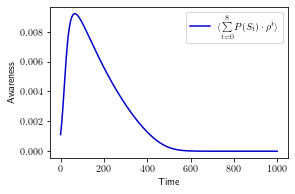

In [ ]:
if __name__ == '__main__':
    plot_awareness()

In [ ]:
def plot_sweep(fname="sweep.png"):
    #plot the highest number of infected against multiple of standard constellation for each parameter

    param_names = ['alpha', 'omega', 'lam', 'rho', 'kappa']
    names = dict(alpha=r'$\alpha$', omega=r'$\omega$', lam=r'$\lambda$', rho=r'$\rho$', kappa=r'$\kappa$')
    markers = dict(alpha='o', omega='^', lam='1', rho='s', kappa='*')
    colors = dict(alpha='cyan', omega='darkred', lam='orange', rho='tab:brown', kappa='tab:cyan')
    
    # default
    default_values, default_concurrent_infections = load_data(f'data/variation_default.pkl')

    fig = plt.figure(figsize=(8, 4))
    axes = [fig.add_subplot(1, 2, i+1) for i in range(2)]

    # variations
    for param, default in zip(param_names[0:3], default_values[:3]):
        param_values, concurrent_infections = load_data( f'data/variation_{param}.pkl')
        print(param, param_values, concurrent_infections)
        axes[0].scatter(np.array(param_values)/default, concurrent_infections, marker=markers[param], label = names[param])
    axes[0].plot([1], default_concurrent_infections, 'kh', label='reference\npoint')
    axes[0].legend()
    axes[0].set_ylabel("max. concurrent infections")
    axes[0].set_xlabel(r"$X / X_{\mathrm{ref}}, \qquad X = \alpha, \omega, \lambda$")

    for param, default in zip(param_names[3:], default_values[3:]):
        param_values, concurrent_infections = load_data( f'data/variation_{param}.pkl')
        print(param, param_values, concurrent_infections)
        s = axes[1].scatter(param_values, concurrent_infections, marker=markers[param], label = names[param], color=colors[param])
        axes[1].plot(default, default_concurrent_infections, 'h', color=s.get_facecolor(), label='reference')
    axes[1].legend()
    axes[1].set_ylabel("max. concurrent infections")
    axes[1].set_xlabel("$\\rho, \\kappa$")

    for ax in axes:
        ax.set_ylim(0, 0.3)
    
    axes[0].set_xscale('log')
    xticks = [0.5, 0.71, 1, 1.41, 2]
    axes[0].set_xticks(xticks, [str(x) for x in xticks])
    axes[0].set_xticks(np.linspace(xticks[0], xticks[-1], int((xticks[-1]-xticks[0])/0.1+1)), [], minor=True)

    fig.tight_layout()
    fig.savefig(f"figures/{fname}")
    plt.show()



alpha [0.03, 0.03657040962613426, 0.04457982867410845, 0.05434341985583439, 0.06624537082042874, 0.08075401155794136, 0.09844024272091653, 0.12] [0.1325608058806156, 0.12566085759084855, 0.11837728802430043, 0.11096002219155446, 0.1036325589125874, 0.09655163553526554, 0.08981838568052439, 0.0834866876716378]
omega [0.03, 0.03657040962613426, 0.04457982867410845, 0.05434341985583439, 0.06624537082042874, 0.08075401155794136, 0.09844024272091653, 0.12] [0.14739837349608043, 0.13704516090893828, 0.12572851335886237, 0.11358497720533159, 0.1008511177468836, 0.08786100306680635, 0.07502173768421393, 0.06276281712140008]
lam [0.025, 0.030475341355111887, 0.03714985722842371, 0.04528618321319533, 0.055204475683690614, 0.06729500963161782, 0.08203353560076379, 0.1] [0.07190431444080049, 0.08103741734435599, 0.09104218398588088, 0.1017368792435589, 0.11289333297962967, 0.12424824113895562, 0.13553635326740618, 0.1464926555971383]
rho [0.1, 0.2142857142857143, 0.3285714285714286, 0.442857142857

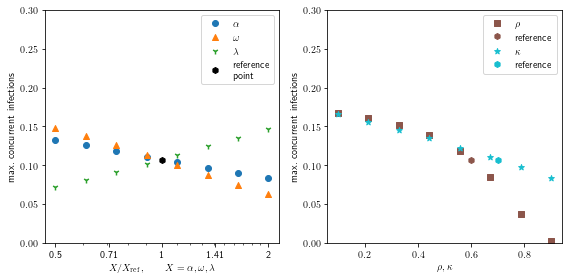

In [ ]:
if __name__ == '__main__':
    plot_sweep()

In [ ]:
def plot_awareness_compartments(awareness_params, simulation_params, figsize=(4, 2)):
    fig = plt.figure(figsize=figsize)
    axes = [fig.add_subplot(1, 2, i+1) for i in range(2)]
    rho = awareness_params[3]
    n =  simulation_params[1]
    sus = np.array(susceptibility(rho, n))
    awareness = 1 - sus
    axes[0].bar(np.array(range(n)), awareness)#, color='cornflowerblue') 
    axes[1].bar(np.array(range(n)), sus)#, color='cornflowerblue')
    for ax in axes:
        ax.set_xticks(range(n))
        ax.set_xlabel('compartment')
    axes[0].set_ylabel('awareness')
    axes[0].text(5, 0.5, r'$\rho^i$')
    axes[1].set_ylabel('susceptibility')
    fig.tight_layout()
    fig.savefig('figures/susceptibility_compartments')
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac0f8ce2-3132-47be-a4d1-6216636e93ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>